# Introduction to neural network classification with TensorFlow

In this notebook we are going to learn how to write neural networks for classification problem

A classification is where you try to classify something as one thing or another.

A few types of classification problems:
* Binary classification
* Multiclass classification
* Multilabel classification

## Creating data to view and fit

In [ ]:
from sklearn.datasets import make_circles

# Create 1000 samples
n_samples = 1000

# Create circles
X, y = make_circles(n_samples=n_samples,
                    noise=0.03,
                    random_state=42)

In [ ]:
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [ ]:
y

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,

 Our data is a little hard to understand right now.. Let's visualise it!

In [ ]:
import pandas as pd
circles = pd.DataFrame({"X0":X[:, 0], "X1":X[:, 1], "label":y})
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


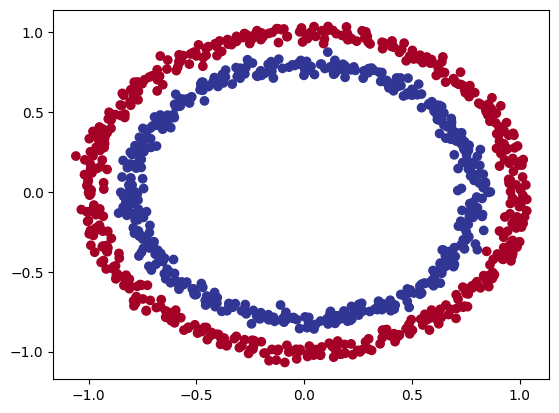

In [ ]:
# Visualize with a plot
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)

## Input and output shapes

In [ ]:
# Check the shapees of our features and labels
X.shape, y.shape

((1000, 2), (1000,))

In [ ]:
# How many samples we're working
len(X), len(y)

(1000, 1000)

In [ ]:
# View the first example of features and labels
X[0], y[0]

(array([0.75424625, 0.23148074]), 1)

## Steps in modeling

In [ ]:
import tensorflow as tf

model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(2,)),
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.BinaryCrossentropy(),
    metrics=["accuracy"]
)

history = model.fit(X, y, epochs=20)

Epoch 1/20
32/32 [==============================] - 6s 8ms/step - loss: 0.7077 - accuracy: 0.5000
Epoch 2/20
32/32 [==============================] - 0s 6ms/step - loss: 0.7031 - accuracy: 0.4900
Epoch 3/20
32/32 [==============================] - 0s 6ms/step - loss: 0.7000 - accuracy: 0.4560
Epoch 4/20
32/32 [==============================] - 0s 6ms/step - loss: 0.6976 - accuracy: 0.4390
Epoch 5/20
32/32 [==============================] - 0s 7ms/step - loss: 0.6964 - accuracy: 0.4720
Epoch 6/20
32/32 [==============================] - 0s 6ms/step - loss: 0.6950 - accuracy: 0.4720
Epoch 7/20
32/32 [==============================] - 0s 5ms/step - loss: 0.6938 - accuracy: 0.4800
Epoch 8/20
32/32 [==============================] - 0s 6ms/step - loss: 0.6930 - accuracy: 0.4680
Epoch 9/20
32/32 [==============================] - 0s 6ms/step - loss: 0.6919 - accuracy: 0.4760
Epoch 10/20
32/32 [==============================] - 0s 7ms/step - loss: 0.6909 - accuracy: 0.4900
Epoch 11/20
32/32 [

In [ ]:
# Let's try and impove our model by learning for longer
model.fit(X, y, epochs=200, verbose=0)

In [ ]:
model.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.2492 - accuracy: 1.0000


[0.24917249381542206, 1.0]

Sinve we're working on a binary classification problem and our model is getting around 50% accuracy... it's performing as if it's guessing.

So let's step things up a notch and add an extra layer.

In [ ]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

model_2.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.BinaryCrossentropy(),
    metrics=["accuracy"]
)

model_2.fit(X, y, epochs=100, verbose=0)

In [ ]:
# Evaluate it
model_2.evaluate(X, y)

32/32 [==============================] - 0s 3ms/step - loss: 0.8502 - accuracy: 0.5000


[0.8502146005630493, 0.5]

In [ ]:
circles["label"].value_counts()

1    500
0    500
Name: label, dtype: int64

## Improving our model

In [ ]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model_3.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.BinaryCrossentropy(),
    metrics=["accuracy"]
)

model_3.fit(X, y, epochs=100, verbose=0)

In [ ]:
model_3.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.7002 - accuracy: 0.5080


[0.7001672387123108, 0.5080000162124634]

In [ ]:
model_3.predict(X).shape, X.shape
X, y

32/32 [==============================] - 0s 1ms/step


(array([[ 0.75424625,  0.23148074],
        [-0.75615888,  0.15325888],
        [-0.81539193,  0.17328203],
        ...,
        [-0.13690036, -0.81001183],
        [ 0.67036156, -0.76750154],
        [ 0.28105665,  0.96382443]]),
 array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
        0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
        0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
        1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
        1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
        1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
        0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
        1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
        1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
        0, 1, 1, 0, 1, 0, 1, 

To visualize our model's predictions let's create a func `plot_decision_boundary()`

* Take in a trained_model, features (X), labels (y)
* Create a meshgrid of the diff X values
* Make predictions across the meshgrid
* Plot the predictions as well as a lines between zones (where each unique class falls)

In [ ]:
import numpy as np

def plot_decision_boundary(model, X, y):
  # Define the axis boundaries pf the plot and create a meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))

  # Create X value (we're going to make predictions on these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together

  # Make predictions
  y_pred = model.predict(x_in)

  # Check for multi-class
  if len(y_pred[0]) > 1:
    print("doing multi-class classification")
    # reshape it
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classification")
    y_pred = np.round(y_pred).reshape(xx.shape)

  # Plot the decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, apha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

In [ ]:
X, y

(array([[ 0.75424625,  0.23148074],
        [-0.75615888,  0.15325888],
        [-0.81539193,  0.17328203],
        ...,
        [-0.13690036, -0.81001183],
        [ 0.67036156, -0.76750154],
        [ 0.28105665,  0.96382443]]),
 array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
        0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
        0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
        1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
        1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
        1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
        0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
        1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
        1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
        0, 1, 1, 0, 1, 0, 1, 

313/313 [==============================] - 1s 2ms/step
doing binary classification


<ipython-input-18-37f27e8aae2d>:26: UserWarning: The following kwargs were not used by contour: 'apha'
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, apha=0.7)


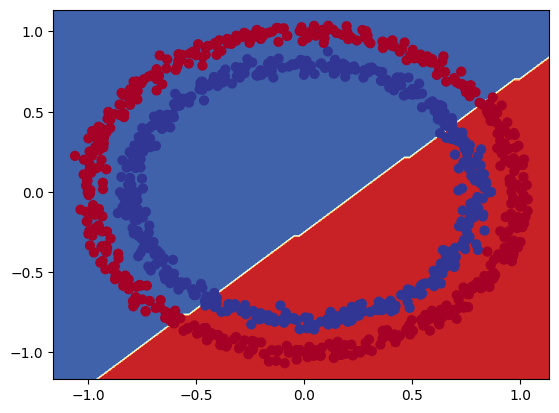

In [ ]:
# Check out the predictions our model is making
plot_decision_boundary(model=model_3,
                       X=X,
                       y=y)

In [ ]:
x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
x_min, x_max

(-1.1595024599098636, 1.1337117525463376)

In [ ]:
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))


In [ ]:
# Let's see if our model can be used for a regression problem...

tf.random.set_seed(42)

# Create some regression data
X_regression = tf.range(1, 1000, 5)
y_regression = tf.range(100, 1100, 5) # y = X + 100
X_regression, y_regression

# Split our regression data into training and test sets
X_reg_train = X_regression[:150]
X_reg_test = X_regression[150:]
y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]

# Fit our model
# model_3.fit(X_reg_train, y_reg_train, epochs=100)

Oh wait... we compiled our model for a binary classification problem.

But.. we're now working on a regression problem, let's change the model to suit our data.

In [ ]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model_3.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.mae,
    metrics=["mae"]
)

model_3.fit(tf.expand_dims(X_reg_train, axis=-1), y_reg_train, epochs=100)

Epoch 1/100
5/5 [==============================] - 1s 6ms/step - loss: 413.8434 - mae: 413.8434
Epoch 2/100
5/5 [==============================] - 0s 4ms/step - loss: 323.4896 - mae: 323.4896
Epoch 3/100
5/5 [==============================] - 0s 7ms/step - loss: 234.5443 - mae: 234.5443
Epoch 4/100
5/5 [==============================] - 0s 4ms/step - loss: 139.8363 - mae: 139.8363
Epoch 5/100
5/5 [==============================] - 0s 4ms/step - loss: 53.2731 - mae: 53.2731
Epoch 6/100
5/5 [==============================] - 0s 4ms/step - loss: 73.3342 - mae: 73.3342
Epoch 7/100
5/5 [==============================] - 0s 6ms/step - loss: 75.0537 - mae: 75.0537
Epoch 8/100
5/5 [==============================] - 0s 4ms/step - loss: 50.2747 - mae: 50.2747
Epoch 9/100
5/5 [==============================] - 0s 3ms/step - loss: 45.4494 - mae: 45.4494
Epoch 10/100
5/5 [==============================] - 0s 4ms/step - loss: 46.7536 - mae: 46.7536
Epoch 11/100
5/5 [==============================] -

2/2 [==============================] - 0s 6ms/step


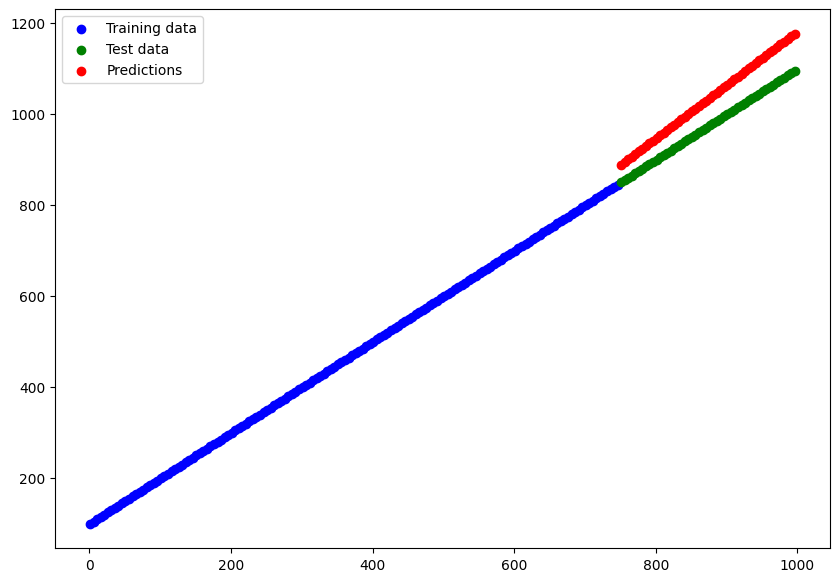

In [ ]:

y_reg_preds = model_3.predict(X_reg_test)

plt.figure(figsize=(10, 7))
plt.scatter(X_reg_train, y_reg_train, c="b", label="Training data")
plt.scatter(X_reg_test, y_reg_test, c="g", label="Test data")
plt.scatter(X_reg_test, y_reg_preds, c="r", label="Predictions")
plt.legend();

## The missing piece: Non-linearity

In [ ]:
import tensorflow as tf
import numpy as np

# Set the random seed
tf.random.set_seed(42)

# Create the model
model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(
        units=1,
        activation=tf.keras.activations.linear),
])

model_4.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.BinaryCrossentropy(),
    metrics=["accuracy"]
)

history = model_4.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 3ms/step - loss: 4.3654 - accuracy: 0.4680
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 4.3206 - accuracy: 0.4650
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 4.3016 - accuracy: 0.4660
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 4.2840 - accuracy: 0.4620
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 4.2336 - accuracy: 0.4620
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 4.2202 - accuracy: 0.4620
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 4.2138 - accuracy: 0.4610
Epoch 8/100
32/32 [==============================] - 0s 3ms/step - loss: 4.1994 - accuracy: 0.4630
Epoch 9/100
32/32 [==============================] - 0s 3ms/step - loss: 4.1717 - accuracy: 0.4640
Epoch 10/100
32/32 [==============================] - 0s 3ms/step - loss: 4.1437 - accuracy: 0.4630
Epoch 11/

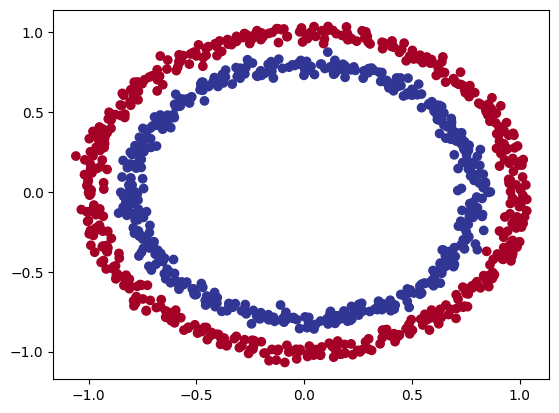

In [ ]:
# Check out cour data
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)

313/313 [==============================] - 0s 1ms/step
doing binary classification


<ipython-input-18-37f27e8aae2d>:26: UserWarning: The following kwargs were not used by contour: 'apha'
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, apha=0.7)


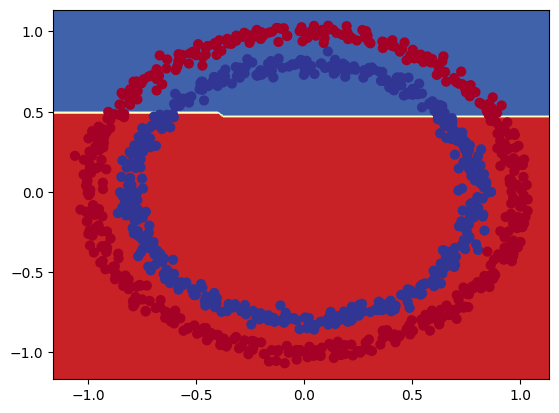

In [ ]:
# Check the decision boundary for our latest model
plot_decision_boundary(model=model_4,
                       X=X,
                       y=y)

Let's try to build our first neural network with a non-linear activation function.

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create a model with a non-linear activation
model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(
        units=1,
        activation="relu" # tf.keras.activations.relu
    )
])

# Compile a model
model_5.compile(
    optimizer="adam", # tf.keras.optimizers.Adam(learning_rate=0.001)
    loss="binary_crossentropy", # tf.keras.losses.binary_crossentropy
    metrics=["accuracy"]
)

# Fit a model
history = model_5.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 3ms/step - loss: 5.0992 - accuracy: 0.4760
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 4.9588 - accuracy: 0.4780
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 4.8596 - accuracy: 0.4790
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 4.7650 - accuracy: 0.4800
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 4.6974 - accuracy: 0.4760
Epoch 6/100
32/32 [==============================] - 0s 4ms/step - loss: 4.6530 - accuracy: 0.4750
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 4.6279 - accuracy: 0.4740
Epoch 8/100
32/32 [==============================] - 0s 3ms/step - loss: 4.5848 - accuracy: 0.4760
Epoch 9/100
32/32 [==============================] - 0s 3ms/step - loss: 4.5435 - accuracy: 0.4760
Epoch 10/100
32/32 [==============================] - 0s 4ms/step - loss: 4.5229 - accuracy: 0.4740
Epoch 11/

In [ ]:
# Time to replicate the multi-layer neural network (2 layers - 8 sum neurons)

tf.random.set_seed(42)

# Create a model
model_6 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1)
])

model_6.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss=tf.keras.losses.binary_crossentropy,
    metrics=["accuracy"]
)

history = model_6.fit(X, y, epochs=250)

Epoch 1/250
32/32 [==============================] - 1s 4ms/step - loss: 3.3484 - accuracy: 0.5000
Epoch 2/250
32/32 [==============================] - 0s 4ms/step - loss: 2.6449 - accuracy: 0.5000
Epoch 3/250
32/32 [==============================] - 0s 4ms/step - loss: 2.2019 - accuracy: 0.5000
Epoch 4/250
32/32 [==============================] - 0s 4ms/step - loss: 1.4363 - accuracy: 0.5000
Epoch 5/250
32/32 [==============================] - 0s 4ms/step - loss: 1.1499 - accuracy: 0.5000
Epoch 6/250
32/32 [==============================] - 0s 4ms/step - loss: 1.0928 - accuracy: 0.4920
Epoch 7/250
32/32 [==============================] - 0s 4ms/step - loss: 1.0473 - accuracy: 0.4500
Epoch 8/250
32/32 [==============================] - 0s 3ms/step - loss: 1.0066 - accuracy: 0.4390
Epoch 9/250
32/32 [==============================] - 0s 4ms/step - loss: 0.9702 - accuracy: 0.4630
Epoch 10/250
32/32 [==============================] - 0s 5ms/step - loss: 0.9350 - accuracy: 0.4700
Epoch 11/

In [ ]:
model_6.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.0642 - accuracy: 0.9890


[0.064177006483078, 0.9890000224113464]

313/313 [==============================] - 1s 2ms/step
doing binary classification


<ipython-input-18-37f27e8aae2d>:26: UserWarning: The following kwargs were not used by contour: 'apha'
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, apha=0.7)


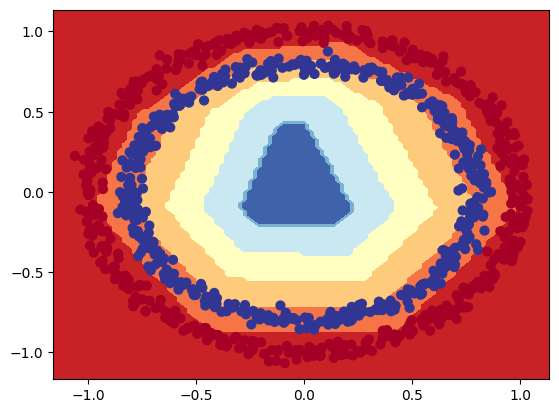

In [ ]:
plot_decision_boundary(model_6, X, y)

In [ ]:
# Model_7 with softmax activation function. End?...
tf.random.set_seed(42)

# Create a model
model_7 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_7.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss=tf.keras.losses.binary_crossentropy,
    metrics=['accuracy']
)

history = model_7.fit(X, y, epochs=150)

Epoch 1/150
32/32 [==============================] - 1s 4ms/step - loss: 0.6911 - accuracy: 0.5010
Epoch 2/150
32/32 [==============================] - 0s 3ms/step - loss: 0.6905 - accuracy: 0.5030
Epoch 3/150
32/32 [==============================] - 0s 4ms/step - loss: 0.6899 - accuracy: 0.5110
Epoch 4/150
32/32 [==============================] - 0s 3ms/step - loss: 0.6893 - accuracy: 0.5120
Epoch 5/150
32/32 [==============================] - 0s 4ms/step - loss: 0.6888 - accuracy: 0.5150
Epoch 6/150
32/32 [==============================] - 0s 4ms/step - loss: 0.6882 - accuracy: 0.5150
Epoch 7/150
32/32 [==============================] - 0s 4ms/step - loss: 0.6874 - accuracy: 0.5380
Epoch 8/150
32/32 [==============================] - 0s 4ms/step - loss: 0.6869 - accuracy: 0.5390
Epoch 9/150
32/32 [==============================] - 0s 4ms/step - loss: 0.6861 - accuracy: 0.5330
Epoch 10/150
32/32 [==============================] - 0s 4ms/step - loss: 0.6855 - accuracy: 0.5430
Epoch 11/

In [ ]:
# Evaluate it
model_7.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.1073 - accuracy: 0.9940


[0.1072821170091629, 0.9940000176429749]

313/313 [==============================] - 1s 2ms/step
doing binary classification


<ipython-input-18-37f27e8aae2d>:26: UserWarning: The following kwargs were not used by contour: 'apha'
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, apha=0.7)


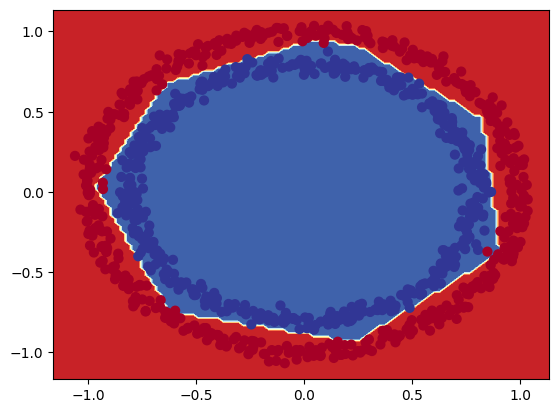

In [ ]:
# Plot predictions
plot_decision_boundary(model_7, X, y)

Now we've discussed the concept of linear and non-linear functions (or lines), let'see them in action.

In [ ]:
# Create a toy a tensor (similiar to the data we pass into our models)
A = tf.cast(tf.range(-10, 10), dtype=tf.float32)

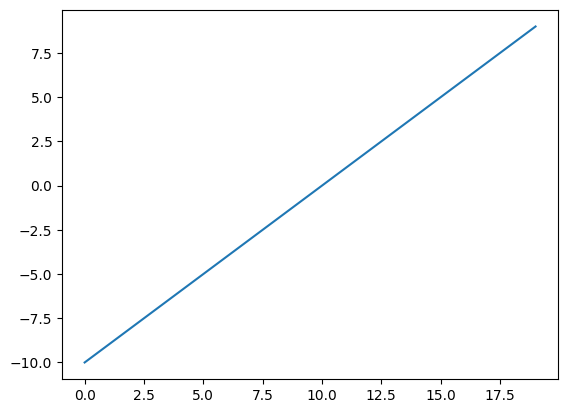

In [ ]:
# Visualize our toy tensor
plt.plot(A);

In [ ]:
# Let's start by replicating sigmoid - sigmoid(x) = 1 / (1 + exp(-x))
def sigmoid(x):
  return 1 / (1 + tf.math.exp(-x))


# Use the sigmoid func on our toy tensor
sigmoid(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397868e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726230e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105854e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

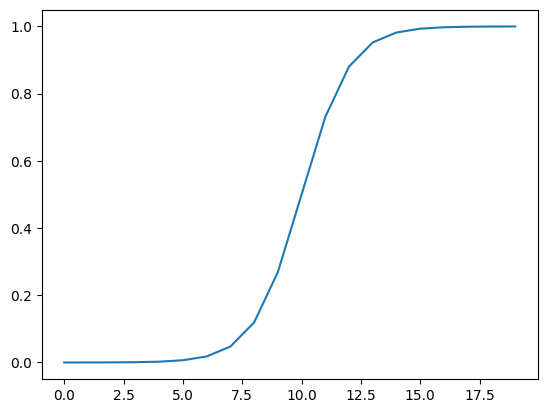

In [ ]:
# Plot our toy tensor transformed by sigmoid
plt.plot(sigmoid(A));

In [ ]:
# Let's recreate a ReLU activation function
def relu(x):
  return tf.maximum(x, 0)

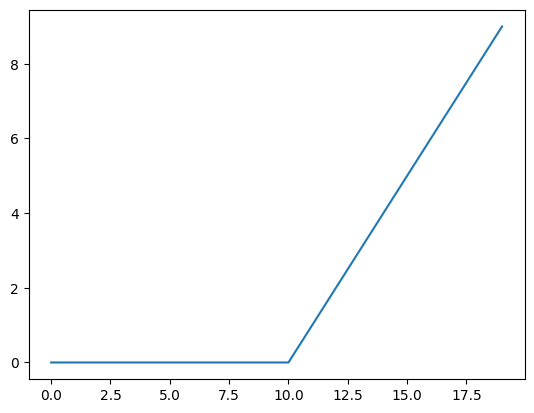

In [ ]:
# Plot a toy tensor to a ReLU activation tensor
plt.plot(relu(A));

In [ ]:
# Let's try linear func
tf.keras.activations.linear(A);

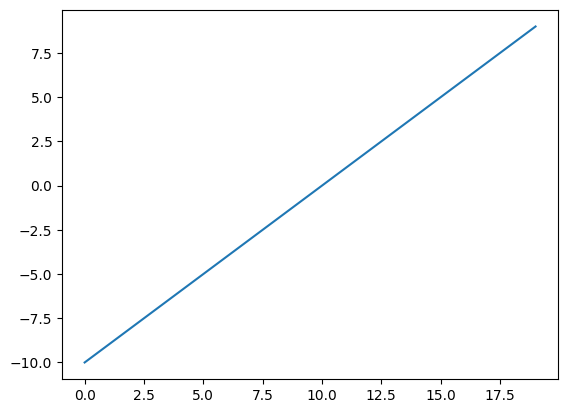

In [ ]:
# Does linear activation functions change anything?
plt.plot(tf.keras.activations.linear(A));

In [ ]:
# Does A even change?
A == tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=bool, numpy=
array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])>

## Evaluating and improving our classification model

So far we've been training and testing on the same dataset...

However, in machine learning this iss basically a sin.

So let's create a training and test set.

In [ ]:
# Check how many examples we have
len(X), len(y)

(1000, 1000)

In [ ]:
# Split into train and test sets
X_train, y_train = X[:800], y[:800]
X_test, y_test = X[800:], y[800:]

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 2), (200, 2), (800,), (200,))

In [ ]:
# Let's recreate a model to fit on the training data and evalueate on the test data

# Set the random seed
tf.random.set_seed(42)

# Create a model
model_8 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_8.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    loss=tf.keras.losses.binary_crossentropy,
    metrics=['accuracy']
)

history = model_8.fit(X_train, y_train, epochs=25)

Epoch 1/25
25/25 [==============================] - 1s 3ms/step - loss: 0.7019 - accuracy: 0.4638
Epoch 2/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6926 - accuracy: 0.4900
Epoch 3/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6878 - accuracy: 0.5150
Epoch 4/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6810 - accuracy: 0.5512
Epoch 5/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6695 - accuracy: 0.6313
Epoch 6/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6539 - accuracy: 0.5725
Epoch 7/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6339 - accuracy: 0.7100
Epoch 8/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6076 - accuracy: 0.7200
Epoch 9/25
25/25 [==============================] - 0s 3ms/step - loss: 0.5783 - accuracy: 0.7487
Epoch 10/25
25/25 [==============================] - 0s 3ms/step - loss: 0.5433 - accuracy: 0.7763
Epoch 11/25
25/25 [

In [ ]:
# Evaluate the model on a test dataset
model_8.evaluate(X_test, y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.3159 - accuracy: 0.8900


[0.3159460425376892, 0.8899999856948853]

313/313 [==============================] - 1s 2ms/step
doing binary classification
 61/313 [====>.........................] - ETA: 0s

<ipython-input-18-37f27e8aae2d>:26: UserWarning: The following kwargs were not used by contour: 'apha'
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, apha=0.7)


313/313 [==============================] - 1s 2ms/step
doing binary classification


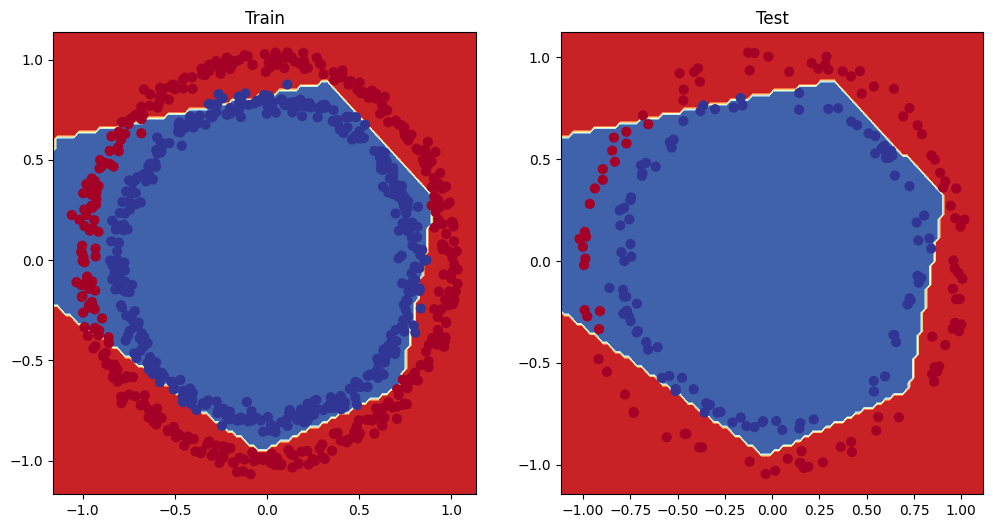

In [ ]:
# Plot the decision boundaries for the training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_8, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_8, X_test, y_test)
plt.show()

## Plot the loss (or training) curves

In [ ]:
# Convert the history object into a DataFrame
h = pd.DataFrame(history.history)

<Axes: >

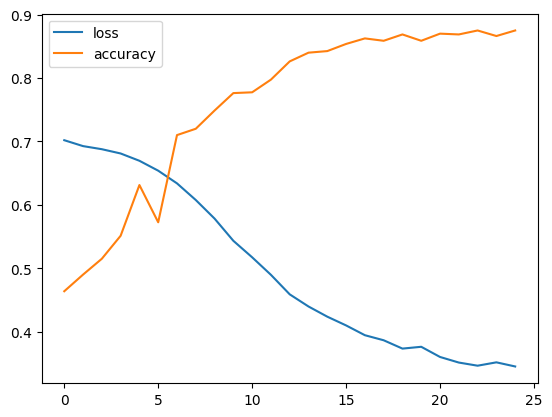

In [ ]:
# Plot the loss curves
h.plot()

**Note:** For many problems, the loss function going down means the model is improving.

## Finding the best learning rate

To find the ideal learning rate(the learning rate where the loss decreases the most during training) we're going to use following steps:
* A learning rate **callback** - extra piece of functionality, you can add to your *while* it's training
* Another model (we could use the same one as abov, but we're practicing building models here)
* A modified loss curves plot.

In [ ]:
# Set the random seed
tf.random.set_seed(42)

# Create a model
model_9 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid'),
])

# Compile a model
model_9.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.mae,
    metrics=["accuracy"]
)

# Create a learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * (10**(epoch/20)))

# Fit the model (with callback)
history_9 = model_9.fit(
    X_train,
    y_train,
    epochs=100,
    callbacks=[lr_scheduler]
)

Epoch 1/100
25/25 [==============================] - 1s 3ms/step - loss: 0.4974 - accuracy: 0.4988 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 3ms/step - loss: 0.4974 - accuracy: 0.5013 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 3ms/step - loss: 0.4973 - accuracy: 0.5000 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 3ms/step - loss: 0.4973 - accuracy: 0.4825 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 3ms/step - loss: 0.4972 - accuracy: 0.4888 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 3ms/step - loss: 0.4972 - accuracy: 0.4850 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 3ms/step - loss: 0.4971 - accuracy: 0.4950 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 3ms/step - loss: 0.4970 - accuracy: 0.4950 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 3ms/step - loss:

<Axes: xlabel='epochs'>

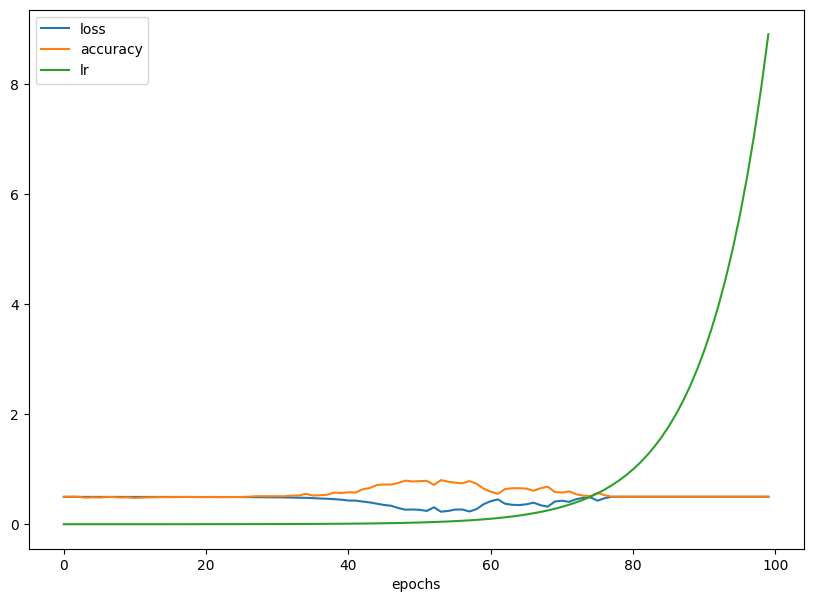

In [ ]:
# Checkout the history
pd.DataFrame(history_9.history).plot(figsize=(10, 7), xlabel='epochs')

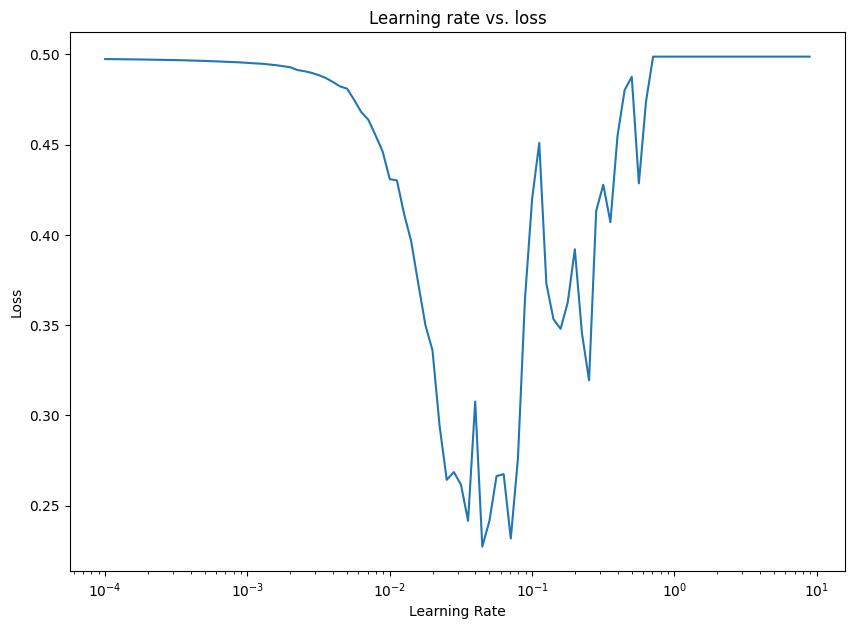

In [ ]:
# Plot the learning rate versus loss
lrs = 1e-4 * (10** (tf.range(100)/20))
plt.figure(figsize=(10, 7))
plt.semilogx(lrs, history_9.history["loss"])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning rate vs. loss");

In [ ]:
0.06

0.06

In [ ]:
# Let's try using an ideal learning rate with the same mode

# Set the random seed
tf.random.set_seed(42)

# Create model
model_10 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile a model
model_10.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.02),
    loss=tf.keras.losses.binary_crossentropy,
    metrics=['accuracy']
)

# Fit the model
model_10.fit(X_train, y_train, epochs=20)

Epoch 1/20
25/25 [==============================] - 1s 3ms/step - loss: 0.6913 - accuracy: 0.5312
Epoch 2/20
25/25 [==============================] - 0s 3ms/step - loss: 0.6823 - accuracy: 0.5537
Epoch 3/20
25/25 [==============================] - 0s 3ms/step - loss: 0.6678 - accuracy: 0.5713
Epoch 4/20
25/25 [==============================] - 0s 3ms/step - loss: 0.6489 - accuracy: 0.6275
Epoch 5/20
25/25 [==============================] - 0s 3ms/step - loss: 0.6300 - accuracy: 0.6800
Epoch 6/20
25/25 [==============================] - 0s 3ms/step - loss: 0.5856 - accuracy: 0.7000
Epoch 7/20
25/25 [==============================] - 0s 3ms/step - loss: 0.5266 - accuracy: 0.7788
Epoch 8/20
25/25 [==============================] - 0s 3ms/step - loss: 0.4369 - accuracy: 0.8375
Epoch 9/20
25/25 [==============================] - 0s 3ms/step - loss: 0.3144 - accuracy: 0.9275
Epoch 10/20
25/25 [==============================] - 0s 3ms/step - loss: 0.2096 - accuracy: 0.9762
Epoch 11/20
25/25 [

In [ ]:
# Evaluate the model 10
model_10.evaluate(X_test, y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.0378 - accuracy: 0.9900


[0.037780895829200745, 0.9900000095367432]

In [ ]:
# Evaluate the model 8
model_8.evaluate(X_test, y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.3159 - accuracy: 0.8900


[0.3159460425376892, 0.8899999856948853]

313/313 [==============================] - 1s 2ms/step
doing binary classification
 65/313 [=====>........................] - ETA: 0s

<ipython-input-18-37f27e8aae2d>:26: UserWarning: The following kwargs were not used by contour: 'apha'
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, apha=0.7)


313/313 [==============================] - 0s 2ms/step
doing binary classification


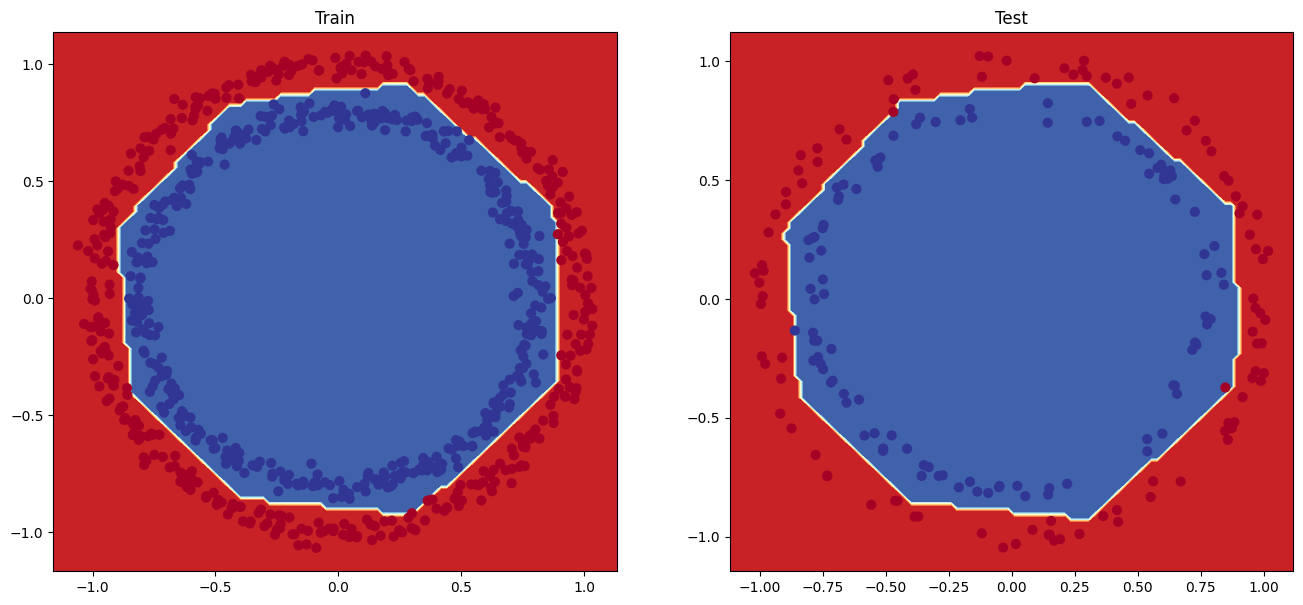

In [ ]:
plt.figure(figsize=(16, 7))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_10, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_10, X_test, y_test)

In [ ]:
# Use Precision metrics for the same task

# Set the random seed
tf.random.set_seed(42)

# Create a model
model_11 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_11.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.02),
    loss=tf.keras.losses.binary_crossentropy,
    metrics=[tf.keras.metrics.Precision()]
)

model_11.fit(X_train, y_train, epochs=20)

Epoch 1/20
25/25 [==============================] - 2s 4ms/step - loss: 0.7410 - precision: 0.4597
Epoch 2/20
25/25 [==============================] - 0s 4ms/step - loss: 0.6925 - precision: 0.5441
Epoch 3/20
25/25 [==============================] - 0s 4ms/step - loss: 0.6846 - precision: 0.5518
Epoch 4/20
25/25 [==============================] - 0s 5ms/step - loss: 0.6732 - precision: 0.5852
Epoch 5/20
25/25 [==============================] - 0s 5ms/step - loss: 0.6604 - precision: 0.5853
Epoch 6/20
25/25 [==============================] - 0s 4ms/step - loss: 0.6404 - precision: 0.5959
Epoch 7/20
25/25 [==============================] - 0s 4ms/step - loss: 0.6203 - precision: 0.6149
Epoch 8/20
25/25 [==============================] - 0s 4ms/step - loss: 0.5936 - precision: 0.6279
Epoch 9/20
25/25 [==============================] - 0s 4ms/step - loss: 0.5591 - precision: 0.6747
Epoch 10/20
25/25 [==============================] - 0s 4ms/step - loss: 0.5078 - precision: 0.7283
Epoch 11/

In [ ]:
model_11.evaluate(X_test, y_test)

7/7 [==============================] - 0s 4ms/step - loss: 0.3293 - precision: 0.8182


[0.32925957441329956, 0.8181818127632141]

313/313 [==============================] - 1s 2ms/step
doing binary classification


<ipython-input-18-37f27e8aae2d>:26: UserWarning: The following kwargs were not used by contour: 'apha'
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, apha=0.7)


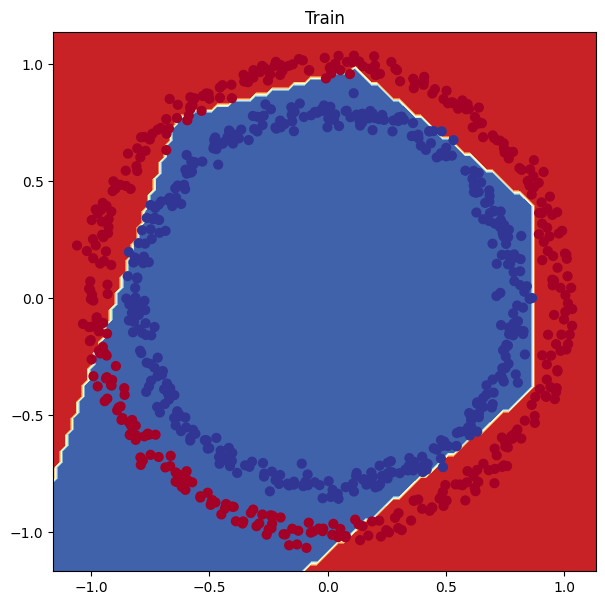

In [ ]:
plt.figure(figsize=(7, 7))
plt.title("Train")
plot_decision_boundary(model_11, X_train, y_train)

In [ ]:
tf.cast(X_train, dtype=tf.float64), tf.cast(y_train, dtype=tf.int8)

(<tf.Tensor: shape=(800, 2), dtype=float64, numpy=
 array([[ 0.75424625,  0.23148074],
        [-0.75615888,  0.15325888],
        [-0.81539193,  0.17328203],
        ...,
        [-0.64889467, -0.51222194],
        [-0.18878747,  0.74504113],
        [-0.27333143, -0.70507331]])>,
 <tf.Tensor: shape=(800,), dtype=int8, numpy=
 array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
        0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
        0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
        1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
        1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
        1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
        0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
        1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
     

In [ ]:
# using F1-score as a metrics

from sklearn.metrics import f1_score

# Set a random seed
tf.random.set_seed(42)

# Create a model
model_12 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_12.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.02),
    loss=tf.losses.BinaryCrossentropy,
    metrics=[f1_score]
)

# model_12.fit(tf.cast(X_train, dtype=tf.float64), tf.cast(y_train, dtype=tf.int64), epochs=20)

## More classification evaluation metrics

Alongside visualizing our models results as much as posible, there are a handful of other classification evaluation methods & metrics you should be familiar with:
* Accuracy
* Precision
* Recall
* F1-score
* Confusion metrics
* Classification report (from skikit-learn)

In [ ]:
# Check the accuracy of our model
loss, accuracy = model_10.evaluate(X_test, y_test)
print(f'Model loss on the test set: {loss}')
print(f'Model accuracy on the test set: {(accuracy*100):.2f}%')

7/7 [==============================] - 0s 4ms/step - loss: 0.0378 - accuracy: 0.9900
Model loss on the test set: 0.037780895829200745
Model accuracy on the test set: 99.00%


How about a confusion metrix?

In [ ]:
# Create a confusion matrix
from sklearn.metrics import confusion_matrix

# Make predictions
y_preds = model_10.predict(X_test)

# Create a confusion matrix
# confusion_matrix(y_test, y_preds)

7/7 [==============================] - 0s 4ms/step


In [ ]:
y_test[:10]

array([1, 1, 1, 1, 0, 0, 1, 0, 1, 0])

In [ ]:
y_preds[:10]

array([[9.7040713e-01],
       [9.9693549e-01],
       [9.7211444e-01],
       [9.9586678e-01],
       [7.8291938e-02],
       [7.4037077e-04],
       [9.1406763e-01],
       [3.1582897e-03],
       [9.9688989e-01],
       [1.3125321e-01]], dtype=float32)

Oops... looks like our predictions array has come out in ***prediction probability*** form... the standart output from the sigmoid (or softmax) activation functions.

In [ ]:
# Convert our prediction probabilites to binary format and view the first 10
tf.round(y_preds)[:10]

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.]], dtype=float32)>

In [ ]:
# Create a confusion metrix
confusion_matrix(y_test, tf.round(y_preds))

array([[99,  2],
       [ 0, 99]])

How about we prettify our confusion matrix?

In [ ]:
# Note: the confusion matrix code we're about to write is a remix of scikit-learn's plot_confusion_matrix

import itertools

def plot_confusion_matrix(y_test, y_preds):
  figsize = (10, 10)

  # Create the confusion matrix
  cm = confusion_matrix(y_test, tf.round(y_preds))
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize our confusion matrix
  n_classes = cm.shape[0]

  # Let's prettify it
  fig, ax = plt.subplots(figsize=figsize)

  # Create a matrix plot
  cax = ax.matshow(cm, cmap=plt.cm.Blues)
  fig.colorbar(cax)

  # Create classes
  classes = False

  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  # Label the axes
  ax.set(title="Confusion matrix",
        xlabel="Predicted label",
        ylabel="True label",
        xticks=np.arange(n_classes),
        yticks=np.arange(n_classes),
        xticklabels=labels,
        yticklabels=labels)

  # Set x-axis labels to bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Adjust label size
  ax.yaxis.label.set_size(20)
  ax.xaxis.label.set_size(20)
  ax.title.set_size(20)

  # Set threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
            horizontalalignment="center",
            color="white" if cm[i, j] > threshold else "black",
            size=15)

In [ ]:
plot_confusion_matrix(y_test, y_preds)

# Working with a larger example (multiclass classification)

When you have more than two classes as an option, it's known as **multi-class classification**.
* This means if you have 3 different classes, it's multiclass classification.

To practice multi-class classification, we're going to build a neural network to classify images of different items of clothing.



In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

# The data has already been sorted into training and test sets
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


In [2]:
# Show the first training example
print(f"Training sample:\n{X_train[0]}")
print(f"Training labeel:\n{y_train[0]}")

Training sample:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1  

In [3]:
# Check the shape of a single example
X_train[0].shape, y_train[0].shape

((28, 28), ())

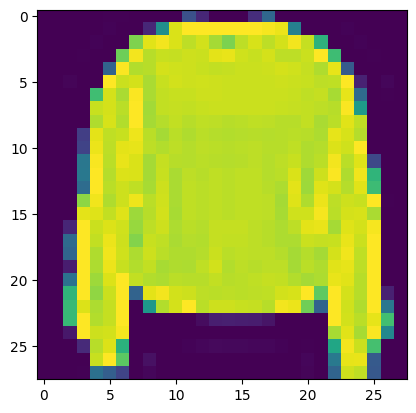

In [4]:
# Plot a single sample
import matplotlib.pyplot as plt
plt.imshow(X_train[7])

In [5]:
# Create a small list so we can index onto our training labels
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

len(class_names)

10

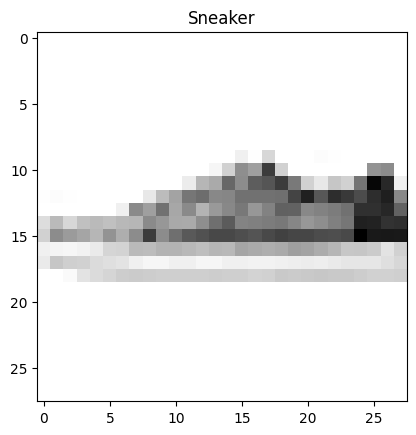

In [6]:
# Plot an example image and its label
index = 23456
plt.imshow(X_train[index], cmap=plt.cm.binary)
plt.title(class_names[y_train[index]]);

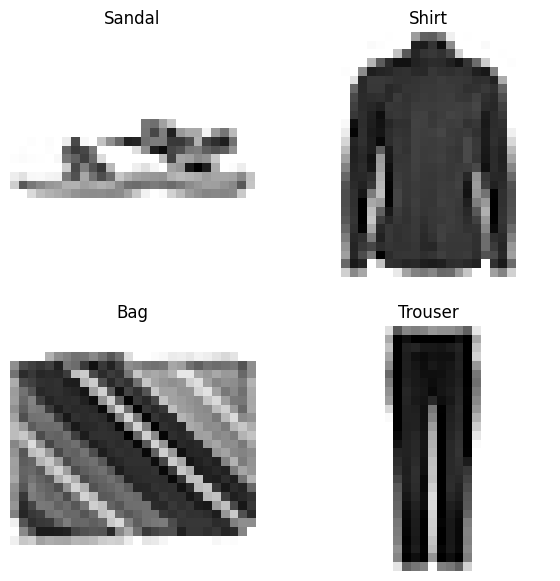

In [7]:
# Plot random image and its label
import random

plt.figure(figsize=(7, 7))
for i in range(4):
  ax = plt.subplot(2, 2, i+1)
  rand_index = random.choice(range(len(X_train)))
  plt.imshow(X_train[rand_index], cmap=plt.cm.binary)
  plt.title(class_names[y_train[rand_index]])
  plt.axis(False)

## Building a multi-class classification model

For out multi-class classification problem we can use a similiar architecture to our binary classfiers, however, we're going to have to tweak a few_things:
* Input shape = 28 * 28 - one image
* Output shape = 10 - one per clothing
* Loss function = tf.keras.losses.CategoricalCrossentropy()
  * If your labels are one-hot encoded, use CategoricalCrossentropy()
  * If your labels are integer form use SparseCategoricalCrossentropy
* Output layer activation = Softmax

In [8]:
# Our data needs to be flatten (28, 28) -> (784,)
flatten_model = tf.keras.Sequential([tf.keras.layers.Flatten(input_shape=(28, 28))])
flatten_model.output_shape

(None, 784)

In [9]:
28*28

784

In [10]:
y_train[:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

In [21]:
# Set random seed
tf.random.set_seed(42)

model_11 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

model_11.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.CategoricalCrossentropy(),
    metrics=["accuracy"]
)

non_norm_history = model_11.fit(X_train,
                                tf.one_hot(y_train, depth=10),
                                epochs=15,
                                validation_data=(X_test, tf.one_hot(y_test, depth=10)))

Epoch 1/15
1875/1875 [==============================] - 9s 4ms/step - loss: 2.4623 - accuracy: 0.0993 - val_loss: 2.3045 - val_accuracy: 0.1000
Epoch 2/15
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3028 - accuracy: 0.0989 - val_loss: 2.3045 - val_accuracy: 0.1000
Epoch 3/15
1875/1875 [==============================] - 5s 3ms/step - loss: 2.3027 - accuracy: 0.1002 - val_loss: 2.3045 - val_accuracy: 0.1000
Epoch 4/15
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3028 - accuracy: 0.0975 - val_loss: 2.3044 - val_accuracy: 0.1000
Epoch 5/15
1875/1875 [==============================] - 5s 3ms/step - loss: 2.3028 - accuracy: 0.0973 - val_loss: 2.3044 - val_accuracy: 0.1000
Epoch 6/15
1875/1875 [==============================] - 5s 2ms/step - loss: 2.3028 - accuracy: 0.0992 - val_loss: 2.3044 - val_accuracy: 0.1000
Epoch 7/15
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3028 - accuracy: 0.0987 - val_loss: 2.3044 - val_accuracy:

In [24]:
# Set random seed
tf.random.set_seed(42)

model_11 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

model_11.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=["accuracy"]
)

non_norm_history = model_11.fit(X_train,
                                y_train,
                                epochs=10,
                                validation_data=(X_test, y_test))

Epoch 1/10
1875/1875 [==============================] - 9s 4ms/step - loss: 2.4574 - accuracy: 0.0982 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 2.3028 - accuracy: 0.0987 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 3/10
1875/1875 [==============================] - 5s 2ms/step - loss: 2.3027 - accuracy: 0.1002 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3028 - accuracy: 0.0975 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 5/10
1875/1875 [==============================] - 5s 2ms/step - loss: 2.3028 - accuracy: 0.0973 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 6/10
1875/1875 [==============================] - 5s 2ms/step - loss: 2.3028 - accuracy: 0.0992 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3028 - accuracy: 0.0987 - val_loss: 2.3026 - val_accuracy:

In [13]:
# Check the model summary
model_11.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 4)                 3140      
                                                                 
 dense_4 (Dense)             (None, 4)                 20        
                                                                 
 dense_5 (Dense)             (None, 10)                50        
                                                                 
Total params: 3210 (12.54 KB)
Trainable params: 3210 (12.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [14]:
# Check the min and max values of the training data
X_train.min(), X_train.max()

(0, 255)

Neural networks prefer data to be scaled (or normalized), this means they liketo have the numbers in the tensors they try to find patterns between 0 & 1.

In [18]:
# We can normalize by dividing by the maximum
X_train_normal = X_train / 255.0
X_test_normal = X_test / 255.0

# check the min and max
X_train_normal.min(), X_train_normal.max()

(0.0, 1.0)

In [20]:
# Now our data is normalized, let's build a model to find patterns in it

# Set random seed
tf.random.set_seed(42)

# Create a model
model_12 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compile a model
model_12.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)

# Fit a model
norm_history = model_12.fit(X_train_normal,
                            y_train,
                            epochs=10,
                            validation_data=(X_test_normal, y_test))

Epoch 1/10
1875/1875 [==============================] - 10s 4ms/step - loss: 1.3630 - accuracy: 0.4850 - val_loss: 0.9870 - val_accuracy: 0.6210
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.9084 - accuracy: 0.6389 - val_loss: 0.8787 - val_accuracy: 0.6395
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.8333 - accuracy: 0.6659 - val_loss: 0.8146 - val_accuracy: 0.6807
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.7718 - accuracy: 0.6875 - val_loss: 0.7853 - val_accuracy: 0.6863
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.7457 - accuracy: 0.6997 - val_loss: 0.7423 - val_accuracy: 0.7201
Epoch 6/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.6846 - accuracy: 0.7451 - val_loss: 0.6774 - val_accuracy: 0.7516
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6346 - accuracy: 0.7656 - val_loss: 0.6548 - val_accurac

> 🔑 **Note:** Neural networks tend to prefer data n numerical form as well as scaled/normilized (numbers between 0 & 1)

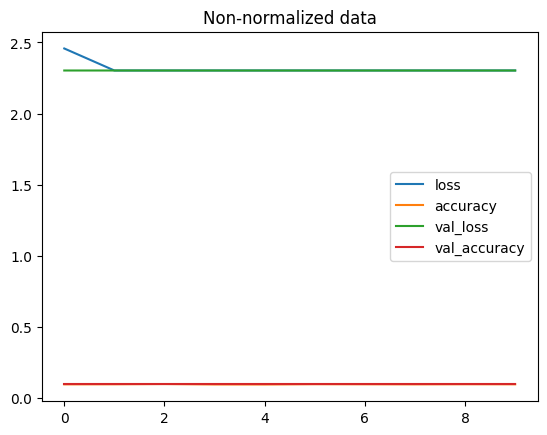

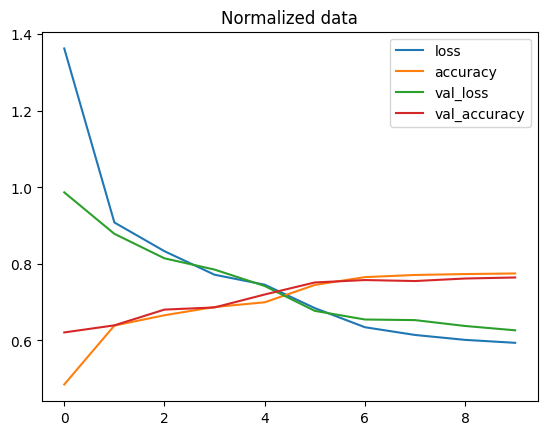

In [28]:
import pandas as pd
# Plot non-normalized data loss curves
pd.DataFrame(non_norm_history.history).plot(title="Non-normalized data")
# Plot normalized data loss curves
pd.DataFrame(norm_history.history).plot(title="Normalized data");

> 🔑 **Note:** The same model with even *slightly* different data can produce *dramatically* different results. So when you're comparing model, it's important to make sure you're comparing them on the same criteria (e.g. same architecture but different data or same data but different arhictecture)

## Finding the ideal learning rate

In [30]:
# Set the random seed
tf.random.set_seed(42)

# Create a model
model_13 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compile a model
model_13.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)

# Create the learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10 ** (epoch/20))

# Fit a model
find_lr_history = model_13.fit(X_train_normal,
                               y_train,
                               epochs=40,
                               validation_data=(X_test_normal, y_test),
                               callbacks=[lr_scheduler])

Epoch 1/40
1875/1875 [==============================] - 8s 3ms/step - loss: 1.2210 - accuracy: 0.5492 - val_loss: 0.7979 - val_accuracy: 0.7027 - lr: 0.0010
Epoch 2/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.7045 - accuracy: 0.7251 - val_loss: 0.6874 - val_accuracy: 0.7280 - lr: 0.0011
Epoch 3/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6439 - accuracy: 0.7369 - val_loss: 0.6515 - val_accuracy: 0.7372 - lr: 0.0013
Epoch 4/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6202 - accuracy: 0.7437 - val_loss: 0.6410 - val_accuracy: 0.7407 - lr: 0.0014
Epoch 5/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6084 - accuracy: 0.7492 - val_loss: 0.6362 - val_accuracy: 0.7429 - lr: 0.0016
Epoch 6/40
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5930 - accuracy: 0.7620 - val_loss: 0.6222 - val_accuracy: 0.7629 - lr: 0.0018
Epoch 7/40
1875/1875 [==============================] - 6s

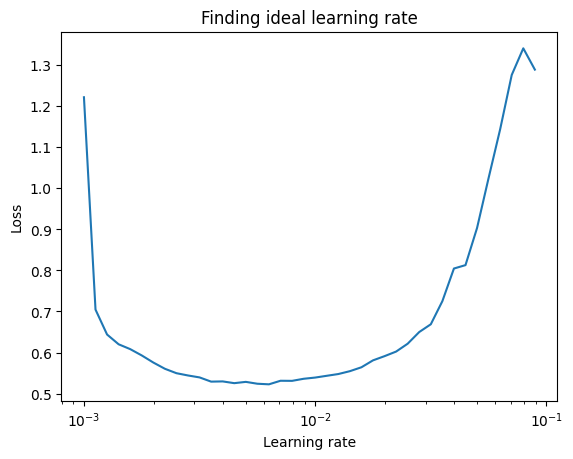

In [33]:
# Plot the learning rate decay curve
import numpy as np
import matplotlib.pyplot as plt

lrs = 1e-3 * (10**(tf.range(40)/20))
plt.semilogx(lrs, find_lr_history.history['loss'])
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Finding ideal learning rate");

In [34]:
10**-3

0.001

In [36]:
# Let' refit a model with the ideal learning rate

# Set random seed
tf.random.set_seed(42)

# Create a model
model_14 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compile a model
model_14.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)

# Fit a model
history_14 = model_14.fit(X_train_normal,
                          y_train,
                          epochs=20,
                          validation_data=(X_test_normal, y_test))

Epoch 1/20
1875/1875 [==============================] - 8s 4ms/step - loss: 1.2458 - accuracy: 0.5611 - val_loss: 0.9385 - val_accuracy: 0.6456
Epoch 2/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.7980 - accuracy: 0.7164 - val_loss: 0.7469 - val_accuracy: 0.7249
Epoch 3/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6698 - accuracy: 0.7592 - val_loss: 0.6654 - val_accuracy: 0.7571
Epoch 4/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.6226 - accuracy: 0.7729 - val_loss: 0.6388 - val_accuracy: 0.7692
Epoch 5/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5977 - accuracy: 0.7801 - val_loss: 0.6215 - val_accuracy: 0.7763
Epoch 6/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5809 - accuracy: 0.7862 - val_loss: 0.6169 - val_accuracy: 0.7715
Epoch 7/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5714 - accuracy: 0.7884 - val_loss: 0.6553 - val_accuracy:

## Evaluating our multi-class classification model

To evaluate our multi-class classification model we could:
* Evaluate its perfomance using other classification metrics (confusion matrix)
* Assess some of its predictions (through visualizations)
* Improve its results (training for longer of changing the architecture)
* Save and export if for use in an application

Let's go through the top 2...

In [38]:
# Create a confusion matrix
import itertools
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15):
  # Create the confusion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize our confusion matrix
  n_classes = cm.shape[0]

  # Let's prettify it
  fig, ax = plt.subplots(figsize=figsize)

  # Create a matrix plot
  cax = ax.matshow(cm, cmap=plt.cm.Blues)
  fig.colorbar(cax)

  # Set labels to be classes
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  # Label the axes
  ax.set(title="Confusion matrix",
        xlabel="Predicted label",
        ylabel="True label",
        xticks=np.arange(n_classes),
        yticks=np.arange(n_classes),
        xticklabels=labels,
        yticklabels=labels)

  # Set x-axis labels to bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Adjust label size
  ax.yaxis.label.set_size(text_size)
  ax.xaxis.label.set_size(text_size)
  ax.title.set_size(text_size)

  # Set threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
            horizontalalignment="center",
            color="white" if cm[i, j] > threshold else "black",
            size=text_size)

Probs is short for "prediction probabilities"

In [39]:
# Make some prediction
y_probs = model_14.predict(X_test_normal) # probs is short for "prediction probabilities"

# View the first 5 probs
y_probs[:5]

313/313 [==============================] - 1s 3ms/step


array([[2.63041904e-04, 8.37670814e-04, 3.21071013e-04, 1.95728542e-04,
        1.74536064e-04, 5.20312786e-02, 4.09217784e-04, 1.60955936e-01,
        5.07707614e-03, 7.79734373e-01],
       [1.92500229e-04, 1.19032357e-07, 4.60371494e-01, 1.38766936e-05,
        3.45319957e-01, 0.00000000e+00, 1.94068149e-01, 0.00000000e+00,
        3.38738355e-05, 0.00000000e+00],
       [1.47803603e-09, 9.98462260e-01, 9.18556453e-10, 2.39095956e-04,
        3.04509827e-04, 4.56441343e-11, 3.28620544e-08, 0.00000000e+00,
        9.94031900e-04, 0.00000000e+00],
       [3.76564974e-10, 9.99635458e-01, 2.63170059e-11, 2.51658959e-04,
        1.79019080e-05, 1.05174305e-08, 2.27243335e-09, 0.00000000e+00,
        9.49531241e-05, 0.00000000e+00],
       [1.93243206e-01, 1.51923770e-04, 2.45605379e-01, 2.75975168e-02,
        2.11990047e-02, 3.27701265e-17, 5.11751354e-01, 3.29872491e-31,
        4.51472966e-04, 1.88751935e-22]], dtype=float32)

> 🔑 **Note:** Remember to make predictions on the same kind of data your model was trained on (e.g. if your model was trained on normalized data, you'll want to maker predictions on normalized data).

In [41]:
y_probs[0], tf.math.argmax(y_probs[0])

(array([2.6304190e-04, 8.3767081e-04, 3.2107101e-04, 1.9572854e-04,
        1.7453606e-04, 5.2031279e-02, 4.0921778e-04, 1.6095594e-01,
        5.0770761e-03, 7.7973437e-01], dtype=float32),
 <tf.Tensor: shape=(), dtype=int64, numpy=9>)

In [42]:
class_names[tf.math.argmax(y_probs[0])]

'Ankle boot'

In [44]:
# Convert all of the predictions probabilities into integers
y_preds = y_probs.argmax(axis=1)

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [45]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_preds)

array([[749,   1,   4,  74,   6,   0, 149,   0,  13,   4],
       [  1, 945,   3,  26,   7,   0,   4,   0,  14,   0],
       [ 16,   1, 437,  10, 284,   0, 231,   0,  20,   1],
       [ 36,  15,   5, 818,  52,   2,  60,   0,  10,   2],
       [  0,   0,  78,  21, 830,   0,  49,   0,  22,   0],
       [  0,   0,   0,   0,   0, 886,   0,  70,   7,  37],
       [149,   1, 228,  52, 166,   1, 372,   0,  30,   1],
       [  0,   0,   0,   0,   0,  31,   0, 933,   0,  36],
       [  0,   8,   8,   4,   9,   7,   8,   7, 946,   3],
       [  1,   0,   0,   0,   0,   8,   0,  47,   1, 943]])

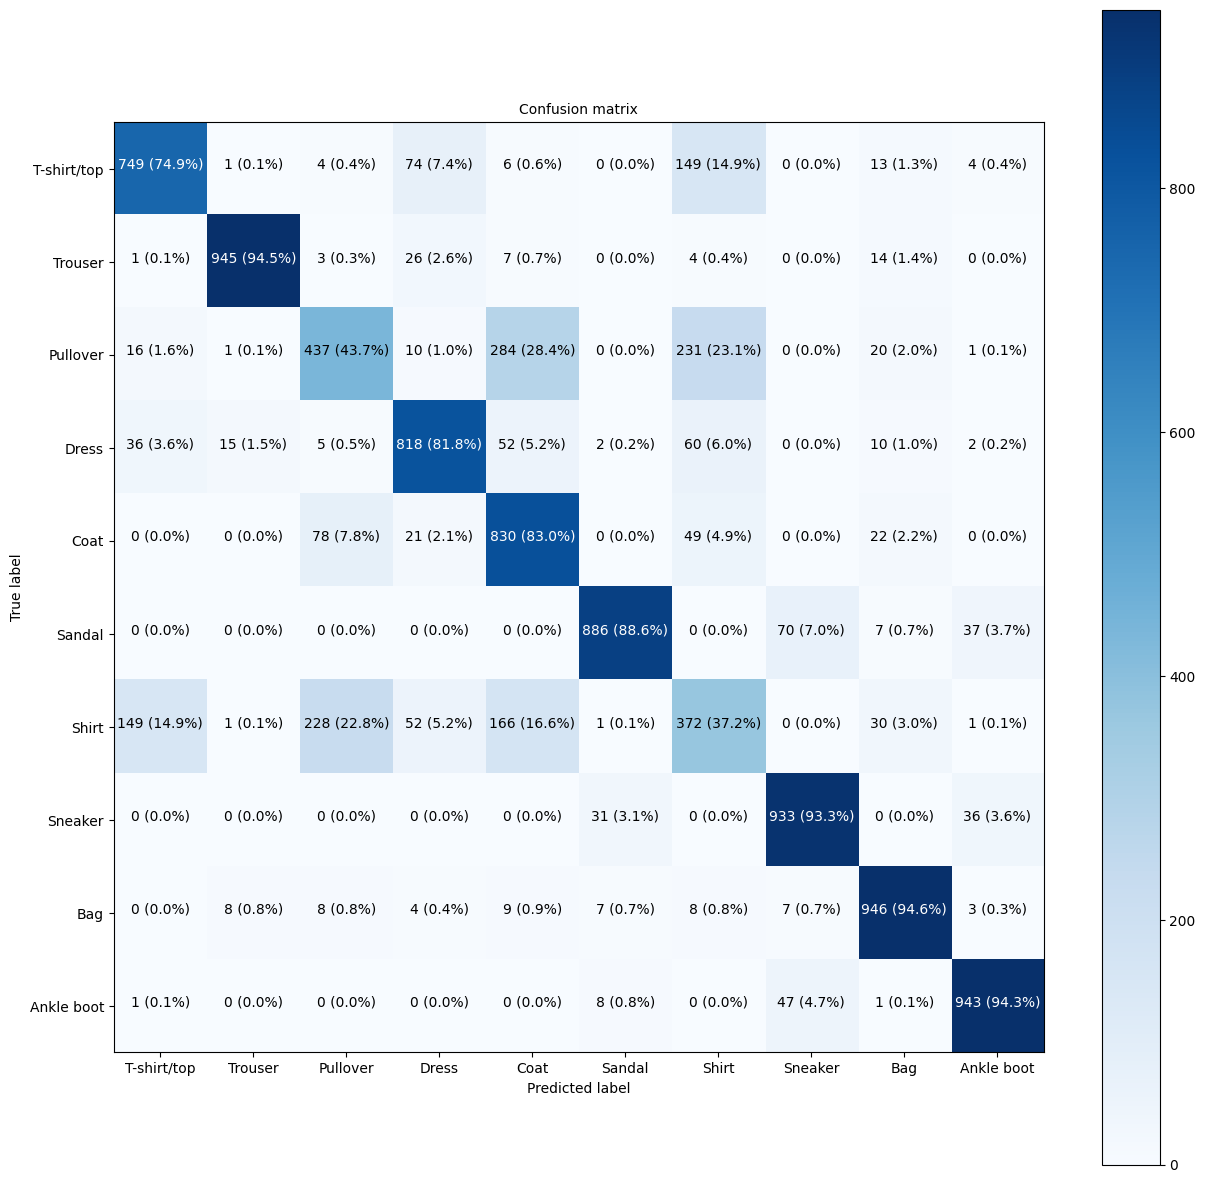

In [48]:
# Make a prettier confusion matrix
plot_confusion_matrix(y_test, y_preds, classes=class_names, figsize=(15, 15), text_size=10)

> 🔑 **Note:** Often when working with images and other forms of visual data, it's a good idea to visualize as much as possible to develop a further understanding of the data and the inputs and outputs of your models.

How about we create a fun little function for:
* Plot a random image
* Make a prediction on said image
* Label the plot with the truth label & predicted label

In [70]:
import random

def plot_random_image(model, images, true_labels, classes):
  """
  Picks a random image, plots it and labels it with a prediction and truth label.
  """

  # Set up random integer
  i = random.randint(0, len(images))

  # Create predictions and targets
  target_image = images[i]
  pred_probs = model.predict(target_image.reshape(1, 28, 28))
  pred_label = classes[pred_probs.argmax()]
  true_label = classes[true_labels[i]]

  # Plot the image
  plt.imshow(target_image, cmap=plt.cm.binary)

  # Change the color of the titles depending on if the predictions write or wrong
  if pred_label == true_label:
    color = 'green'
  else:
    color = 'red'

  # Add xlabel information
  plt.xlabel("Pred: {} {:2.0f}% (True: {})".format(pred_label,
                                                    100*tf.reduce_max(pred_probs),
                                                    true_label),
             color=color)


1/1 [==============================] - 0s 21ms/step


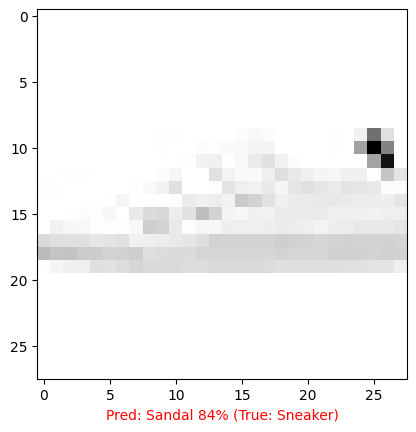

In [82]:
# Check out a random image as well as its prediction
plot_random_image(model=model_14,
                  images=X_test_normal,
                  true_labels=y_test,
                  classes=class_names)

## What patterns is our model learning?

In [83]:
# Find the layers of our most recent model
model_14.layers

In [84]:
# Extract a particular layer
model_14.layers[1]

In [85]:
# Get the patterns of a layer
weights, biases = model_14.layers[1].get_weights()
weights, biases

(array([[-0.06749733, -0.60369503,  0.54604715,  0.84071994],
        [-0.53531605, -0.5690825 ,  0.4667363 ,  0.48961106],
        [-0.8692996 , -0.2735039 , -0.05140471,  1.0950692 ],
        ...,
        [ 0.11581378, -0.31297553,  0.9196728 ,  0.12983397],
        [-0.02169405, -0.01870642,  0.26761767, -0.24207377],
        [-0.51538146,  0.10835554,  0.7249241 ,  0.4003242 ]],
       dtype=float32),
 array([2.9879193 , 0.8406282 , 0.65426534, 1.9352989 ], dtype=float32))

Now let's check our the bias vector...

In [86]:
biases, biases.shape

(array([2.9879193 , 0.8406282 , 0.65426534, 1.9352989 ], dtype=float32), (4,))

Every neuron has a bias vector. Each of these is paired with a weights matrix.

The bias vector get initalized as zeros. (in Dense layers)

The bias vector dictates how much the patterns within the corresponding weights matrix should influence the next layer.

In [87]:
model_14.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_11 (Flatten)        (None, 784)               0         
                                                                 
 dense_30 (Dense)            (None, 4)                 3140      
                                                                 
 dense_31 (Dense)            (None, 4)                 20        
                                                                 
 dense_32 (Dense)            (None, 10)                50        
                                                                 
Total params: 3210 (12.54 KB)
Trainable params: 3210 (12.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


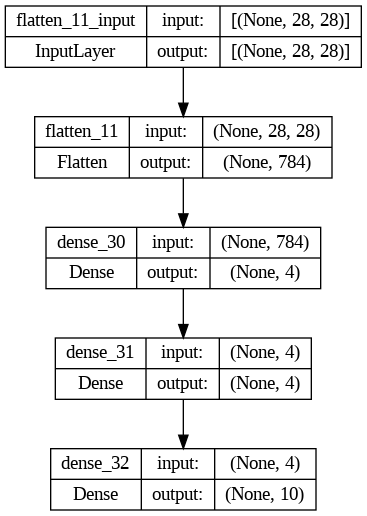

In [89]:
# Let's check out another way of viewing our deep learning models
from tensorflow.keras.utils import plot_model

# See the inputs and outputs of each layer
plot_model(model_14, show_shapes=True)

# Next: check out exercises and extra curriculum...